In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2, random

Get data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/dataset.zip /content/dataset.zip
import zipfile
%cd "/content"
with zipfile.ZipFile('dataset.zip', 'r') as file:
    file.extractall()

Mounted at /content/drive
/content


In [ ]:
from google.colab import files
uploaded = files.upload()

/content


Get PIDM

In [ ]:
%rm -rf "PIDM"

In [ ]:
print ("Installing Libraries...")
import os; os.system('pip install --upgrade --no-cache-dir gdown tensorfn')
print ("---> Successfully Installed.")
print ("Downloading PIDM models...")
os.system('git clone https://github.com/ArefMYTB/PIDM')
os.system('gdown 1WkV5Pn-_fBdiZlvVHHx_S97YESBkx4lD && mkdir PIDM/checkpoints && mv last.pt PIDM/checkpoints/last.pt')
print ("---> Successfully Downloaded.")

Installing Libraries...
---> Successfully Installed.
---> Successfully Downloaded.


In [ ]:
!pip uninstall pydantic
!pip install pydantic==1.10.12

Found existing installation: pydantic 2.3.0
Uninstalling pydantic-2.3.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pydantic-2.3.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pydantic/*
Proceed (Y/n)? y
  Successfully uninstalled pydantic-2.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.3 MB/s eta 0:00:00


In [ ]:
%cd "PIDM"
from predict import Predictor
from IPython.display import Image
from google.colab import files

/content/PIDM


torch.Size([1, 20, 256, 256])


50it [00:12,  3.85it/s]


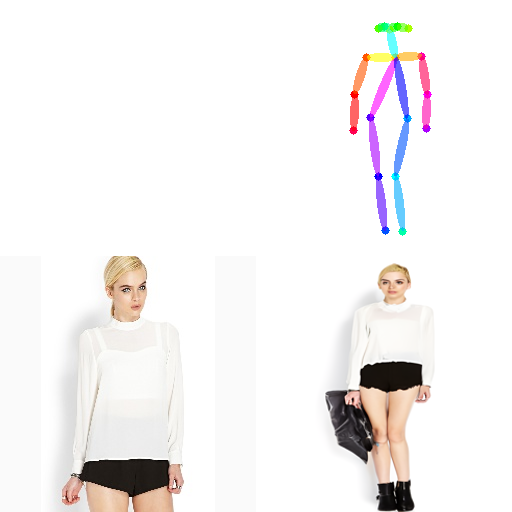

In [ ]:
#@title Pose Control using PIDM

obj = Predictor()

### upload a source file
# Path = list(files.upload().keys())[0] # Please check "/content/PIDM/data/" for sample images for source file.
### OR enter the path
Path = "/content/dataset/deepfashion/img/WOMEN/Blouses_Shirts/id_00000001/02_1_front.jpg"
pose = "/content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00000001/02_1_front.txt"
obj.predict_pose(image=Path, pose_path=pose, nsteps=50)

Image('output.png')

# NTED

In [ ]:
!pip install replicate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
img = "/content/dataset/deepfashion/img/WOMEN/Blouses_Shirts/id_00000001/02_1_front.jpg"
pose = "/content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00000001/02_1_front.txt"

In [ ]:
%env REPLICATE_API_TOKEN=r8_R5VN81XHdOFoUVa2pQ90wHkSr1lxZvh0yrAl6

env: REPLICATE_API_TOKEN=r8_R5VN81XHdOFoUVa2pQ90wHkSr1lxZvh0yrAl6


In [ ]:
import replicate
output = replicate.run(
    "renyurui/controllable-person-synthesis:f2a5c4525dcd2868f7db9013e0ad82f82992ab5ce7418d6cc414e0ceca5861ec",
    input={"reference_image": open(img, "rb"),
           "desired_pose": open(pose, "rb")}
)
print(output)

{'result': 'https://replicate.delivery/pbxt/PP8dLEGPsu5bH5AasxX9xScXWFezjOsDUKLtfsG8eNXmRCEjA/result.png', 'target_skeleton': 'https://replicate.delivery/pbxt/UAwJYA3zKp7CKV3hcvHWcwMUPQOnA5FAs0Iy3veqQlJakAxIA/skeleton.png'}


In [ ]:
import os
import glob

In [ ]:
!ls

dataset  dataset.zip  drive  sample_data


In [ ]:
# Define the root directory where your data is stored
root_dir = "/content/dataset/deepfashion/img/WOMEN/Blouses_Shirts"


with open("output.txt", "w") as f:
    # Loop through all subdirectories and files in the root directory
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.jpg')):  # Add more image extensions if needed
                file_path = os.path.join(root, file)
                pose_path = file_path.replace("img", "pose").replace("jpg","txt")

                if os.path.exists(file_path) and os.path.exists(pose_path):
                    print("Image path: {}".format(pose_path))
                    # output = replicate.run(
                    # "renyurui/controllable-person-synthesis:f2a5c4525dcd2868f7db9013e0ad82f82992ab5ce7418d6cc414e0ceca5861ec",
                    # input={"reference_image": open(file_path, "rb"),
                    #       "desired_pose": open(pose_path, "rb")}
                    # print(output)
                    # )
                    f.write(f"{file_path},{pose_path}\n")




Streaming output truncated to the last 5000 lines.
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00005429/04_7_additional.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00005005/04_1_front.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00005005/04_4_full.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00005005/04_3_back.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00005005/04_7_additional.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00002634/03_3_back.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00002634/01_3_back.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00002634/01_2_side.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00002634/03_7_additional.txt
Image path: /content/dataset/deepfashion/pose/WOMEN/Blouses_Shirts/id_00002634/03_1_front.txt